## **SHETH L.U.J. & SIR M.V. COLLEGE**  
### *Data Science / Data Visualization Practical*  

**Name:** *Gungun Jain | T085*

**Practical No.:** 10  

**Aim:** Create meaningful visualizations using the **Indian Kids Screen Time Dataset** and explain the patterns with data storytelling.

---

### 📘 In this notebook we will:
1. Load and understand the kids’ screen time dataset  
2. Explore patterns based on age, gender, device type, and location  
3. Visualize screen time behavior using different types of plots  
4. Tell a clear data story about **how Indian kids are using screens**  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [2]:
print("=== INFO ===")
print(df.info())

print("\n=== MISSING VALUES PER COLUMN ===")
print(df.isna().sum())

print("\n=== BASIC STATS FOR NUMERIC COLUMNS ===")
print(df[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']].describe())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
None

=== MISSING VALUES PER COLUMN ===
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Pr

###  Understanding the Dataset – Who are we analysing?

Each row in this dataset represents **one child** and their screen time pattern.  

Key columns:

- `Age` – age of the child (in years)  
- `Gender` – Male / Female  
- `Avg_Daily_Screen_Time_hr` – average daily screen time in hours  
- `Primary_Device` – main device used (Smartphone, Laptop, TV, Tablet, etc.)  
- `Exceeded_Recommended_Limit` – whether the child exceeds the recommended safe screen time  
- `Educational_to_Recreational_Ratio` – proportion of time spent on **educational vs entertainment** content  
- `Health_Impacts` – reported issues like *eye strain, poor sleep, headache, anxiety* etc.  
- `Urban_or_Rural` – whether the child lives in an urban or rural area  

We will now use visualizations to understand **how kids are using screens** and what patterns appear.


In [3]:
# Convert boolean to string for cleaner plots if needed
df['Exceeded_Recommended_Limit'] = df['Exceeded_Recommended_Limit'].astype(str)

###  Line Plot – Average Daily Screen Time by Age

A line plot is useful to see **trends across ordered values**.  
Here, we look at how **average screen time changes with age**.

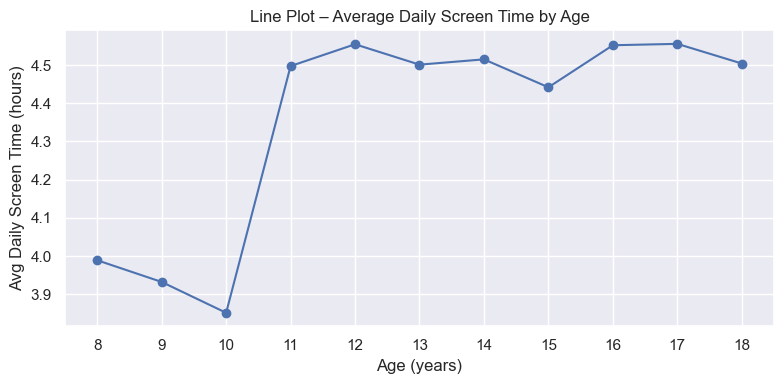

In [4]:
age_screen = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean().sort_index()

plt.figure(figsize=(8,4))
plt.plot(age_screen.index, age_screen.values, marker='o')
plt.title('Line Plot – Average Daily Screen Time by Age')
plt.xlabel('Age (years)')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.xticks(age_screen.index)
plt.tight_layout()
plt.show()

**Story behind this line plot**

This line shows **how screen time grows or drops as kids get older**.

- Points that are **higher on the line** represent ages where kids are spending **more hours per day** on screens.
- A rising trend suggests that as children **grow older**, they tend to use screens more (for studies, social media, gaming, etc.).
- Any sudden jump for a specific age could indicate **board classes, exam years, or heavy use of smartphones**.

This answers:  
 *“At what ages are kids using screens the most?”*


###  Discrete Bar Chart – Number of Kids by Primary Device

A discrete bar chart is perfect for **categorical data** like device types.  
Here we count how many kids primarily use each type of device.

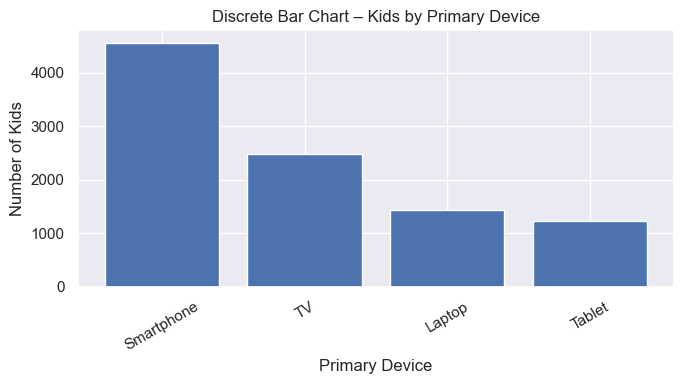

In [5]:
device_counts = df['Primary_Device'].value_counts()

plt.figure(figsize=(7,4))
plt.bar(device_counts.index, device_counts.values)
plt.title('Discrete Bar Chart – Kids by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Number of Kids')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Story behind this bar chart**

This bar chart tells us **which device dominates kids’ digital life**.

- The tallest bar shows the device that is **most commonly used** (often **smartphones** in urban India).  
- Smaller bars represent devices that are used **less often** (maybe TV or tablets).
- This helps us understand **which screen** parents and policymakers should focus on when talking about healthy usage.

  *“Which screen is ruling the lives of Indian kids?”*


###  Histogram – Distribution of Average Daily Screen Time

A histogram helps us see **how screen time is distributed** –  
Are most kids in the safe zone, or are many crossing risky levels?

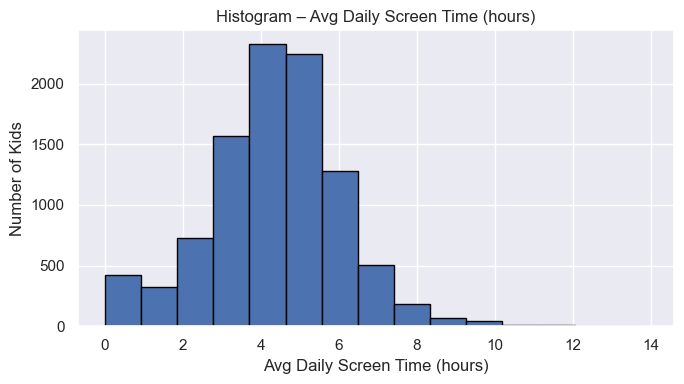

In [6]:
plt.figure(figsize=(7,4))
plt.hist(df['Avg_Daily_Screen_Time_hr'], bins=15, edgecolor='black')
plt.title('Histogram – Avg Daily Screen Time (hours)')
plt.xlabel('Avg Daily Screen Time (hours)')
plt.ylabel('Number of Kids')
plt.tight_layout()
plt.show()

**Story behind this histogram**

- Peaks in the bars show **common screen time ranges**.  
- If many kids fall in **higher hour ranges**, it suggests a **risk of overuse**.  
- If most kids are within a moderate range, screen time might be **more balanced**.

This answers:  
 *“Are most kids spending a little, moderate, or a lot of time on screens?”*


###  Pie Chart – Kids Exceeding Recommended Screen Time

A pie chart is useful to compare **parts of a whole**.  
Here we show the proportion of kids who **exceed the recommended screen time** versus those who don’t.

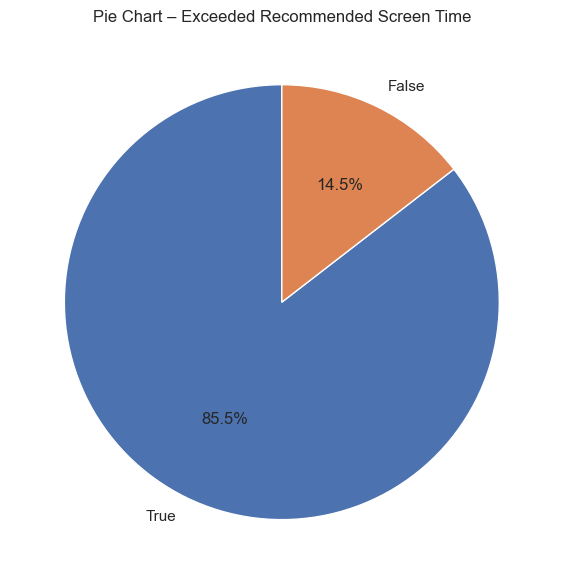

In [7]:
limit_counts = df['Exceeded_Recommended_Limit'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(limit_counts.values, labels=limit_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart – Exceeded Recommended Screen Time')
plt.tight_layout()
plt.show()

**Story behind this pie chart**

- If the **“True” slice is large**, many kids are **crossing healthy screen limits**, which is a serious concern.  
- If **“False” is larger**, it means more kids are within **safe usage** limits.

This gives a quick, visual answer to:  
 *“Are most kids using screens responsibly or excessively?”*


###  Exploded Pie Chart – Urban vs Rural Kids

We now see how our dataset is split between **Urban** and **Rural** kids.  
We “explode” the larger segment to highlight where most of the data comes from.

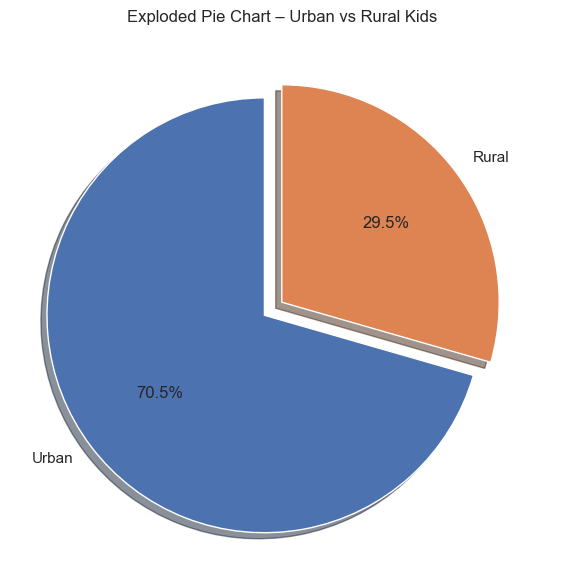

In [8]:
urban_counts = df['Urban_or_Rural'].value_counts()
labels = urban_counts.index
sizes = urban_counts.values
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
plt.title('Exploded Pie Chart – Urban vs Rural Kids')
plt.tight_layout()
plt.show()

**Story behind this exploded pie chart**

- The exploded slice shows whether **Urban or Rural** kids are **more represented** in the dataset.  
- If Urban dominates, our analysis reflects more of **city lifestyle**.  
- If Rural is large, we see more of **village/small town screen behavior**.

This tells us:  
 *“Is this study more urban-focused, rural-focused, or balanced?”*


###  Distribution Plot – Educational to Recreational Screen Ratio

This distribution plot shows how much of kids’ screen time is **educational vs pure entertainment**.

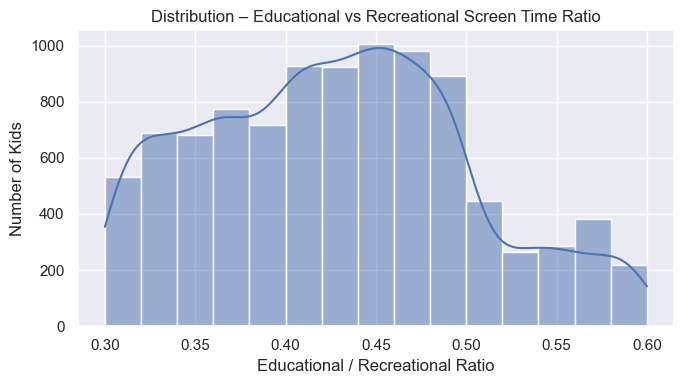

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(df['Educational_to_Recreational_Ratio'], bins=15, kde=True)
plt.title('Distribution – Educational vs Recreational Screen Time Ratio')
plt.xlabel('Educational / Recreational Ratio')
plt.ylabel('Number of Kids')
plt.tight_layout()
plt.show()

**Story behind this distribution plot**

- Ratios closer to **1 or above** mean kids are spending **more or equal time on education** than entertainment.  
- Ratios much **less than 1** mean kids are mostly using screens for **fun, games, and social media**.  
- The KDE curve helps us see the **most common balance** between learning and entertainment.

This answers:  
 *“Are screens helping children to learn, or mostly keeping them entertained?”*


###  Box Plot – Average Screen Time by Gender

A box plot is great for comparing **screen time distribution** between boys and girls.

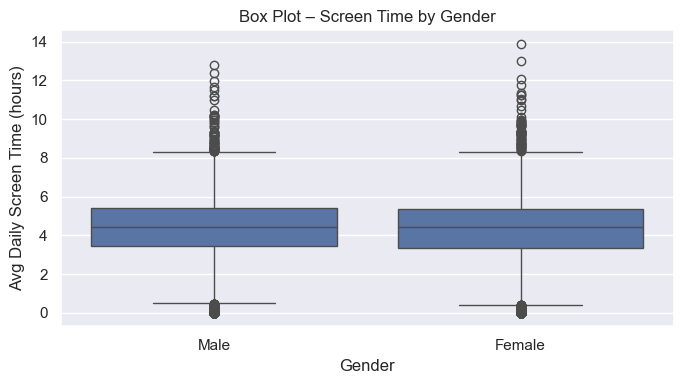

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr')
plt.title('Box Plot – Screen Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.tight_layout()
plt.show()

**Story behind this box plot**

- The **median line** shows the typical screen time for each gender.  
- The **height of the box** shows how much variation there is.  
- Any **dots outside** (outliers) represent kids with **unusually high or low** screen time.

This helps us see:  
 *“Do boys and girls differ in their screen usage?”*


###  Violin Plot – Screen Time by Urban vs Rural

A violin plot shows the **shape of the distribution** for screen time in different locations.

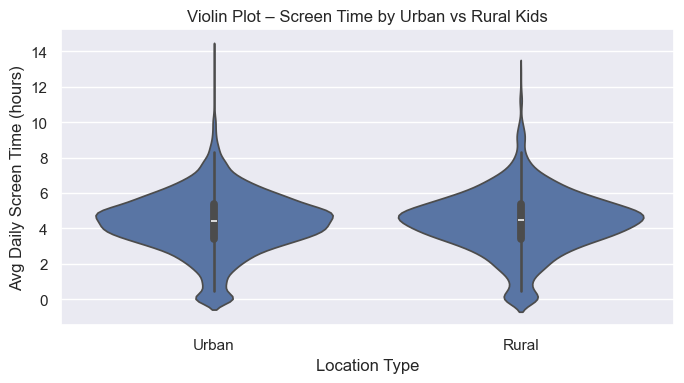

In [11]:
plt.figure(figsize=(7,4))
sns.violinplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr')
plt.title('Violin Plot – Screen Time by Urban vs Rural Kids')
plt.xlabel('Location Type')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.tight_layout()
plt.show()

**Story behind this violin plot**

- **Wider parts** of the violin show ranges where **many kids** fall.  
- It helps us compare whether **Urban kids** generally use screens more than **Rural kids** or vice versa.  
- We can see if one group has more kids with **very high screen time**.

 *“Does living in a city or village change how much time kids spend on screens?”*


###  KDE / Density Plot – Average Screen Time

This KDE plot gives a **smooth overview** of how kids’ daily screen time is distributed.

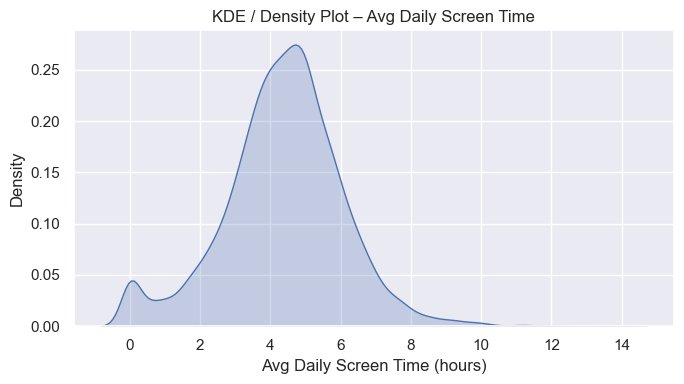

In [12]:
plt.figure(figsize=(7,4))
sns.kdeplot(df['Avg_Daily_Screen_Time_hr'], fill=True)
plt.title('KDE / Density Plot – Avg Daily Screen Time')
plt.xlabel('Avg Daily Screen Time (hours)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

**Story behind this KDE plot**

- Peaks show the **most common screen time ranges**.  
- A long tail to the right means there are **some kids with very high usage**.  
- A sharp, narrow peak means most kids have **similar daily screen time**.

 *“Is screen use concentrated in a safe range, or spread out with a risky high tail?”*


###  KDE Plot – Screen Time by Gender

We now compare the **screen time pattern** of boys vs girls using KDE curves.

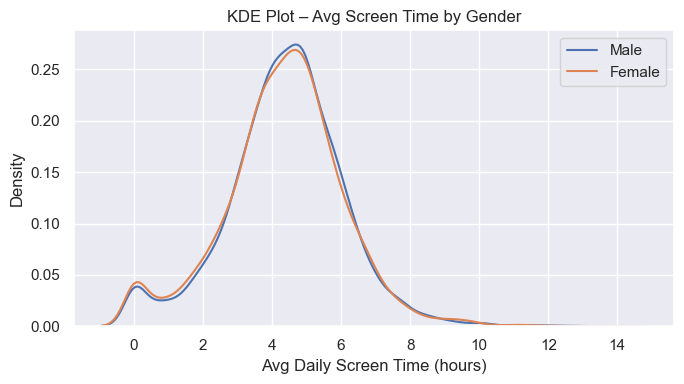

In [13]:
plt.figure(figsize=(7,4))
for g in df['Gender'].dropna().unique():
    sns.kdeplot(df[df['Gender'] == g]['Avg_Daily_Screen_Time_hr'], label=g, fill=False)
plt.title('KDE Plot – Avg Screen Time by Gender')
plt.xlabel('Avg Daily Screen Time (hours)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

**Story behind this KDE comparison**

- If one gender’s curve is consistently **shifted to the right**, that group tends to spend **more time** on screens.  
- Overlapping curves show **similar patterns** for both genders.  

 *“Do boys and girls follow the same screen habits or different ones?”*


###  Sparkline – Screen Time of First 30 Kids

A sparkline is a tiny line plot without axes, used to show a **quick trend**.

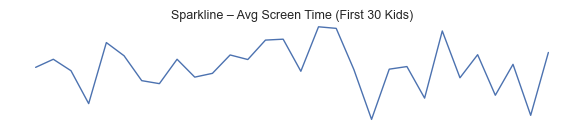

In [14]:
subset = df['Avg_Daily_Screen_Time_hr'].head(30).reset_index(drop=True)
plt.figure(figsize=(6,1.5))
plt.plot(subset, linewidth=1)
plt.axis('off')
plt.title('Sparkline – Avg Screen Time (First 30 Kids)', fontsize=9, pad=2)
plt.tight_layout()
plt.show()

**Story behind this sparkline**

This small line shows how the **screen time of the first 30 kids** jumps up or down.

- Sudden spikes indicate kids with **much higher screen time** than their neighbors.  
- Flat or gentle areas indicate kids with **similar screen habits**.

It gives a fast, visual sense of:  
 *“Is screen time stable across kids, or does it jump a lot?”*


In [15]:
print("===== FINAL DATA STORY – INDIAN KIDS SCREEN TIME =====\n")

print("1) Age vs Screen Time:")
print("   We observed how average screen time changes with age, showing which age groups are most at risk.\n")

print("2) Device Usage:")
print("   Primary device analysis shows which screen (smartphone, TV, laptop, etc.) dominates kids' digital life.\n")

print("3) Healthy vs Excessive Usage:")
print("   The pie chart for Exceeded_Recommended_Limit reveals what percentage of kids cross safe screen time limits.\n")

print("4) Learning vs Entertainment:")
print("   The Educational_to_Recreational_Ratio distribution shows whether screens are helping more in studies or just entertainment.\n")

print("5) Demographic Differences:")
print("   Using box plots, violins, and KDEs, we compared screen time across gender and Urban/Rural backgrounds.\n")

print("Overall, this dataset tells a clear story about how Indian kids are using screens,")
print("which groups are at higher risk of overuse, and how balanced (or unbalanced) their digital lives are.")

===== FINAL DATA STORY – INDIAN KIDS SCREEN TIME =====

1) Age vs Screen Time:
   We observed how average screen time changes with age, showing which age groups are most at risk.

2) Device Usage:
   Primary device analysis shows which screen (smartphone, TV, laptop, etc.) dominates kids' digital life.

3) Healthy vs Excessive Usage:
   The pie chart for Exceeded_Recommended_Limit reveals what percentage of kids cross safe screen time limits.

4) Learning vs Entertainment:
   The Educational_to_Recreational_Ratio distribution shows whether screens are helping more in studies or just entertainment.

5) Demographic Differences:
   Using box plots, violins, and KDEs, we compared screen time across gender and Urban/Rural backgrounds.

Overall, this dataset tells a clear story about how Indian kids are using screens,
which groups are at higher risk of overuse, and how balanced (or unbalanced) their digital lives are.
